In [196]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
from csv import DictReader

In [197]:
hashtag_stance_df = pd.read_csv("final_stance_hashtag.csv")
hashtag_stance = hashtag_stance_df["stance"]
stance_df = pd.read_csv("final_stance_word.csv")
stance = stance_df["stance"]

In [198]:
info_df = pd.read_csv('indiv_strength_diversity.csv')
info_df["stance"] = stance
info_df.head()

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
0,ABabysRights,1,0.083432,0.916568,1,1.0,0.0,-0.7850
1,ABGYNservices,0,0.661536,0.338464,-1,0.0,1.0,0.2930
2,Abigailschumach,1,0.151695,0.848305,1,1.0,0.0,0.1080
3,Alboteaparty,0,0.520985,0.479015,1,1.0,0.0,0.1440
4,alexdelong_,1,0.136951,0.863049,1,1.0,0.0,0.0816


In [199]:
info_hashtag_df = pd.read_csv('hashtag_indiv_strength_diversity.csv')
info_hashtag_df['stance'] = hashtag_stance
info_hashtag_df.head()

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
0,ABabysRights,1,0.112896,0.887104,1,1.0,0.0,-0.6070
1,ABGYNservices,0,0.541203,0.458797,-1,0.0,1.0,0.0320
2,Abigailschumach,1,0.305871,0.694129,1,1.0,0.0,-0.1060
3,Alboteaparty,0,0.561752,0.438248,1,1.0,0.0,-0.0651
4,alexdelong_,1,0.141862,0.858138,1,1.0,0.0,-0.1930


$follower\_of$ column is marked as -1 if the account is a follower of prochoice account, 1 if the account is a follower of prolife account, 0 if both. The stance is in the range [-1, 1], 1 = prochoice, -1 = prolife.

In [200]:
diff = [info_hashtag_df['stance'][i]>0 and info_df['stance'][i]<0 for i in range(0, len(info_hashtag_df['stance']))]
np.sum(diff)

2

In [201]:
diff_2 = [info_hashtag_df['stance'][i]<0 and info_df['stance'][i]>0 for i in range(0, len(info_hashtag_df['stance']))]
np.sum(diff_2)

26

---
#  "prochoice_strength", "prolife_strength" and the "follower of" 

We will examinate the relationship from the dataframe with result calculated by using different set of words in tweets (hashtag or bag of word).

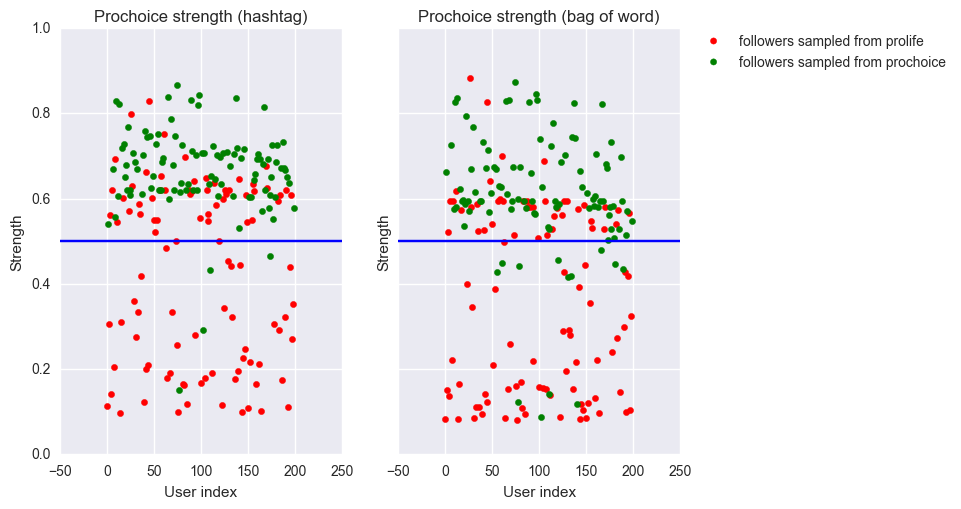

In [202]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, 'prochoice_strength'],
            color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==-1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, 'prochoice_strength'],
            color='g', label='followers sampled from prochoice')
ax1.axhline(y=0.5)
ax1.set_title("Prochoice strength (hashtag)")
ax1.set_xlabel("User index")
ax1.set_ylabel("Strength")

ax2.scatter(x=info_df[info_df['follower of']==1].index, 
            y=info_df.loc[info_df['follower of']==1, 'prochoice_strength'],
            color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df[info_df['follower of']==-1].index, 
            y=info_df.loc[info_df['follower of']==-1, 'prochoice_strength'],
            color='g', label='followers sampled from prochoice')
ax2.axhline(y=0.5)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_title("Prochoice strength (bag of word)")
ax2.set_xlabel("User index")
ax2.set_ylabel("Strength")
plt.show()

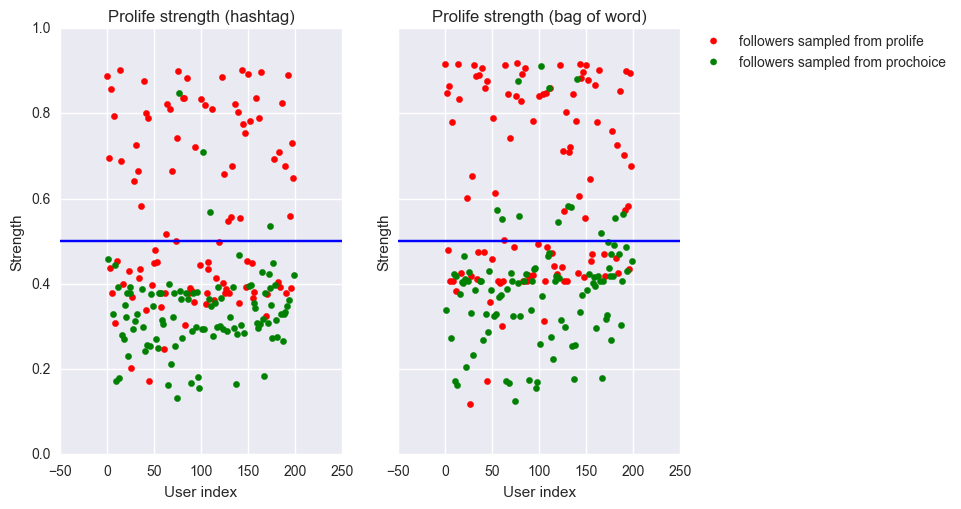

In [203]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, 'prolife_strength'],
            color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==-1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, 'prolife_strength'],
            color='g', label='followers sampled from prochoice')
ax1.axhline(y=0.5)
ax1.set_title("Prolife strength (hashtag)")
ax1.set_xlabel("User index")
ax1.set_ylabel("Strength")

ax2.scatter(x=info_df[info_df['follower of']==1].index, 
            y=info_df.loc[info_df['follower of']==1, 'prolife_strength'],
            color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df[info_df['follower of']==-1].index, 
            y=info_df.loc[info_df['follower of']==-1, 'prolife_strength'],
            color='g', label='followers sampled from prochoice')
ax2.axhline(y=0.5)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_title("Prolife strength (bag of word)")
ax2.set_xlabel("User index")
ax2.set_ylabel("Strength")
plt.show()

---
# "stance" vs the "follower of" 

Stance is in the range [-1, 1], -1 means extremely prolife, 1 means extremely prochoice


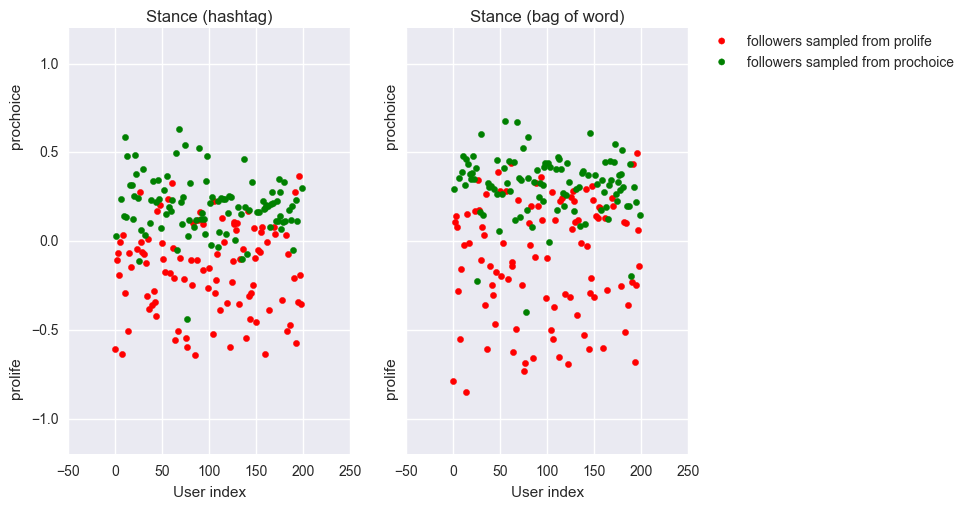

In [204]:
print("Stance is in the range [-1, 1], -1 means extremely prolife, 1 means extremely prochoice")

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, 'stance'],
            color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==-1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, 'stance'],
            color='g', label='followers sampled from prochoice')
ax1.set_title("Stance (hashtag)")
ax1.set_xlabel("User index")
ax1.set_ylim([-1.2, 1.2])
ax1.set_ylabel("prolife                                                 prochoice")

ax2.scatter(x=info_df[info_df['follower of']==1].index, 
            y=info_df.loc[info_df['follower of']==1, 'stance'],
            color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df[info_df['follower of']==-1].index, 
            y=info_df.loc[info_df['follower of']==-1, 'stance'],
            color='g', label='followers sampled from prochoice')
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_ylim([-1.2, 1.2])
ax2.set_title("Stance (bag of word)")
ax2.set_xlabel("User index")
ax2.set_ylabel("prolife                                                 prochoice")
plt.show()

---
#### Plot the relationship between the stance and the following proportions

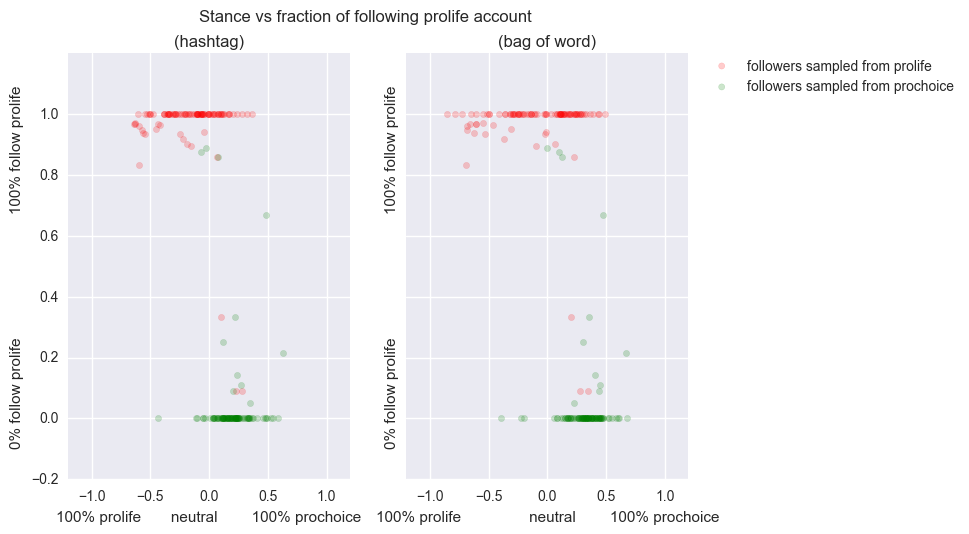

In [205]:

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "prolife proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "prolife proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax1.set_title("(hashtag)")
ax1.set_xlabel("100% prolife       neutral        100% prochoice")
ax1.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax1.set_ylabel("0% follow prolife                             100% follow prolife")

ax2.scatter(x=info_df.loc[info_df['follower of']==1, "stance"], 
            y=info_df.loc[info_df['follower of']==1, "prolife proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df.loc[info_df['follower of']==-1, "stance"], 
            y=info_df.loc[info_df['follower of']==-1, "prolife proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax2.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax2.set_title("(bag of word)")
ax2.set_xlabel("100% prolife                neutral        100% prochoice")
ax2.set_ylabel("0% follow prolife                             100% follow prolife")
plt.suptitle("Stance vs fraction of following prolife account ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

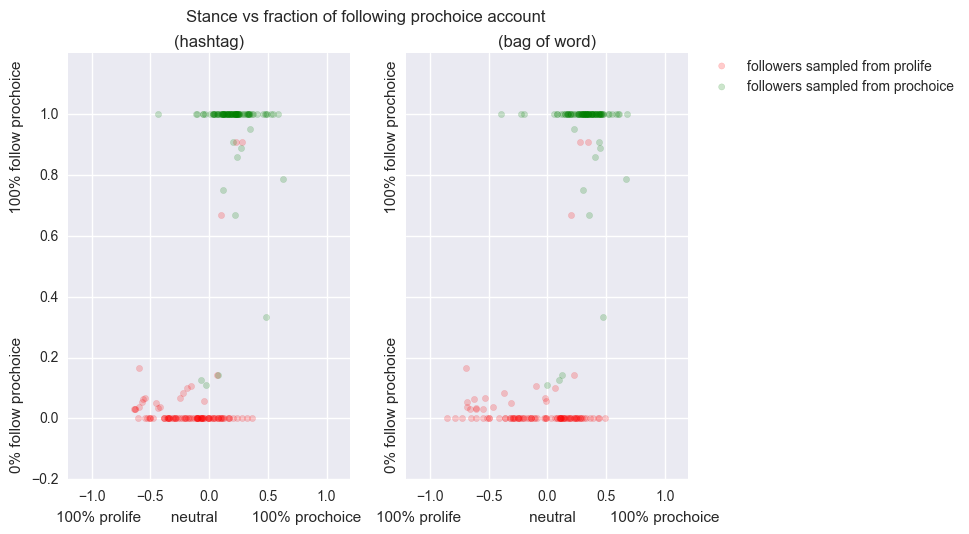

In [206]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "prochoice proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "prochoice proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax1.set_title("(hashtag)")
ax1.set_xlabel("100% prolife       neutral        100% prochoice")
ax1.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax1.set_ylabel("0% follow prochoice                             100% follow prochoice")

ax2.scatter(x=info_df.loc[info_df['follower of']==1, "stance"], 
            y=info_df.loc[info_df['follower of']==1, "prochoice proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df.loc[info_df['follower of']==-1, "stance"], 
            y=info_df.loc[info_df['follower of']==-1, "prochoice proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax2.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax2.set_title("(bag of word)")
ax2.set_xlabel("100% prolife                neutral        100% prochoice")
ax2.set_ylabel("0% follow prochoice                             100% follow prochoice")
plt.suptitle("Stance vs fraction of following prochoice account ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

--------
# Examine unusal individuals with hashtag countings

Individuals who have an extreme stance, e.g. above 0.5 or below -0.5 score, are considered to have more similarities with known prolife/prochoice group. That indicates they tweet in a manner that is similar to prolife/prochoice accounts do. This similarity is in perspective of context and the usage of hashtag. However, if some individuals have a high similarity with a specific group but are following a lot of the opposite group, that is considered to be "unusal" and those are the people we are interested in looking at.

In [207]:
# pick out people whose stance tends to be prochoice but follow more prolife than prochoice
prochoice_unusual_indiv_hashtag = info_hashtag_df.loc[info_hashtag_df["stance"]>0]\
                          .loc[info_hashtag_df["prochoice proportion"]<info_hashtag_df["prolife proportion"]]  

In [208]:
prochoice_unusual_indiv_hashtag

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
8,AngelaFairbanks,0,0.692590,0.307410,1,1.000000,0.000000,0.0368
21,bo_rajer,0,0.620640,0.379360,-1,0.666667,0.333333,0.4830
35,clayguy83,0,0.564452,0.435548,1,1.000000,0.000000,0.0136
45,defenderofthe8,0,0.828466,0.171534,1,1.000000,0.000000,0.1720
48,derrickj2015,0,0.602274,0.397726,1,1.000000,0.000000,0.2030
56,ebethsher,0,0.620640,0.379360,1,1.000000,0.000000,0.2370
61,evonniastarr,0,0.751890,0.248110,1,1.000000,0.000000,0.3270
88,JobsenGrothe,0,0.609833,0.390167,1,1.000000,0.000000,0.1180
90,johng167,0,0.616951,0.383049,1,1.000000,0.000000,0.1620
93,josephintoronto,0,0.641840,0.358160,1,1.000000,0.000000,0.0980


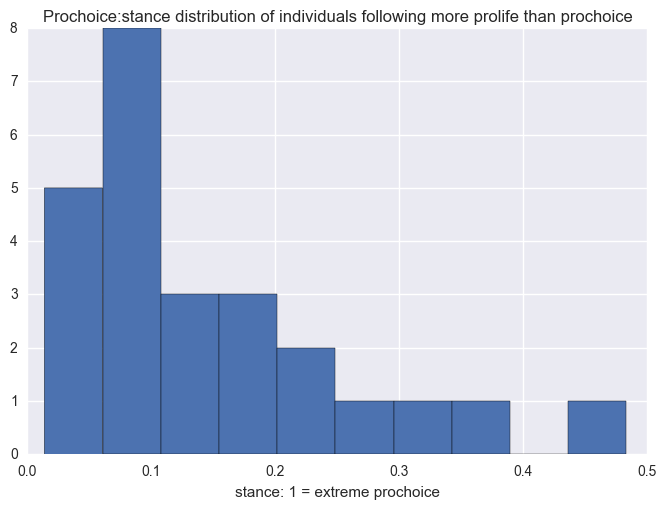

In [209]:
plt.hist(x=prochoice_unusual_indiv_hashtag["stance"])
plt.title("Prochoice:stance distribution of individuals following more prolife than prochoice")
plt.xlabel("stance: 1 = extreme prochoice")
plt.show()

In [210]:
# pick out people whose stance tends to be prolife but follow more prochoice than prolife
info_hashtag_df.loc[info_hashtag_df["stance"]<0]\
.loc[info_hashtag_df["prochoice proportion"]>info_hashtag_df["prolife proportion"]]

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
25,BundeCollins,0,0.607455,0.392545,-1,0.0,1.0,-0.1100
66,formasjuitan,0,0.600194,0.399806,-1,0.0,1.0,-0.0518
77,ibiloh,1,0.151891,0.848109,-1,0.0,1.0,-0.4380
110,KmTilley,1,0.431465,0.568535,-1,0.0,1.0,-0.0312
135,Mr_TomMyers,0,0.703934,0.296066,-1,0.0,1.0,-0.0989
189,trianglescheme,0,0.665922,0.334078,-1,0.0,1.0,-0.0517


--------
# Examine unusal individuals with bag-of-word countings

In [211]:
# pick out people whose stance tends to be prochoice but follow more prolife than prochoice
prochoice_unusual_indiv = info_df.loc[info_df["stance"]>0]\
                                 .loc[info_df["prochoice proportion"]<info_df["prolife proportion"]]  
prochoice_unusual_indiv

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
2,Abigailschumach,1,0.151695,0.848305,1,1.000000,0.000000,0.1080
3,Alboteaparty,0,0.520985,0.479015,1,1.000000,0.000000,0.1440
4,alexdelong_,1,0.136951,0.863049,1,1.000000,0.000000,0.0816
15,bakerbarb54130,1,0.165847,0.834153,1,1.000000,0.000000,0.1520
21,bo_rajer,0,0.587723,0.412277,-1,0.666667,0.333333,0.4770
23,BrianChiasson,1,0.398852,0.601148,1,1.000000,0.000000,0.1710
27,CaRi1765,0,0.580769,0.419231,1,1.000000,0.000000,0.1780
31,CDGonzo2016,1,0.085780,0.914220,1,1.000000,0.000000,0.0823
33,Chuck_Swanson,1,0.111961,0.888039,1,1.000000,0.000000,0.0347
35,clayguy83,0,0.525029,0.474971,1,1.000000,0.000000,0.2640


---
#### Distribution of the following proportion from individuals sampled from prolife group and prochoice group

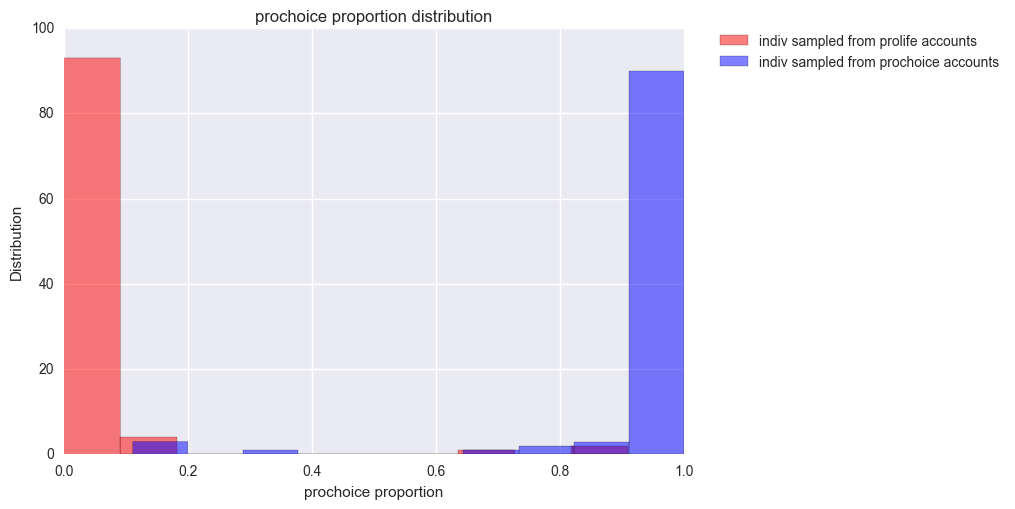

In [212]:
plt.hist(x=info_df.loc[info_df["follower of"]==1, "prochoice proportion"], color='r', alpha=0.5,
         label="indiv sampled from prolife accounts")
plt.hist(x=info_df.loc[info_df["follower of"]==-1, "prochoice proportion"], color='b', alpha=0.5,
         label="indiv sampled from prochoice accounts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Distribution")
plt.xlabel("prochoice proportion")
plt.title("prochoice proportion distribution")
plt.show()

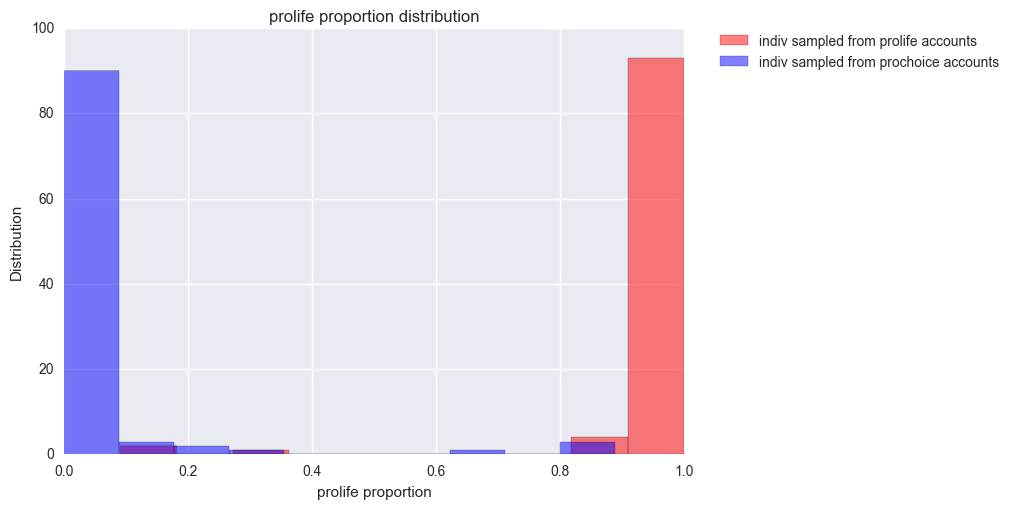

In [213]:
plt.hist(x=info_df.loc[info_df["follower of"]==1, "prolife proportion"], color='r', alpha=0.5,
         label="indiv sampled from prolife accounts")
plt.hist(x=info_df.loc[info_df["follower of"]==-1, "prolife proportion"], color='b', alpha=0.5,
         label="indiv sampled from prochoice accounts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Distribution")
plt.xlabel("prolife proportion")
plt.title("prolife proportion distribution")
plt.show()

---
# Examine the hashtag/word vector for unusual individuals

In [214]:
data_path = 'hashtag_classifier.mat'

data = sio.loadmat(data_path)
org_account_type = data['training_labels'].T
org_account_data = data['training_data'] 
indiv_account_data = data['individual_data'] 
indiv_account_order = data['individual_account_order'] 

hashtag_df = pd.DataFrame({
    'user': [s.strip() for s in indiv_account_order],
    'hashtag_vector': list(indiv_account_data)
})
hashtag_df.head()

,hashtag_vector,user
0,"[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.0,...",ABabysRights
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ABGYNservices
2,"[2.0, 1.0, 5.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",Abigailschumach
3,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",Alboteaparty
4,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",alexdelong_


In [215]:
data_path = 'classifier.mat'

data = sio.loadmat(data_path)
org_account_type = data['training_labels'].T
org_account_data = data['training_data'] 
indiv_account_data = data['individual_data'] 
indiv_account_order = data['individual_account_order'] 

word_df = pd.DataFrame({
    'user': [s.strip() for s in indiv_account_order],
    'word_vector': list(indiv_account_data)
})
word_df.head()

,user,word_vector
0,ABabysRights,"[5.0, 0.0, 5.0, 8.0, 10.0, 12.0, 2.0, 1.0, 4.0..."
1,ABGYNservices,"[22.0, 3.0, 1.0, 3.0, 4.0, 9.0, 11.0, 5.0, 3.0..."
2,Abigailschumach,"[19.0, 0.0, 50.0, 9.0, 25.0, 5.0, 3.0, 8.0, 23..."
3,Alboteaparty,"[17.0, 2.0, 61.0, 11.0, 51.0, 17.0, 5.0, 13.0,..."
4,alexdelong_,"[10.0, 1.0, 17.0, 4.0, 2.0, 4.0, 6.0, 4.0, 2.0..."


In [216]:
with open("select_word.csv") as f:
    words = [row["word"].strip() for row in DictReader(f)]

with open("select_hashtag.csv") as f:
    hashtags = [row["word"].strip() for row in DictReader(f)]

def get_hashtag_vec(user_name):
    result = []
    for n in hashtag_df.loc[hashtag_df['user']==user_name, 'hashtag_vector']:
        result.append(n)
    return result[0]

def get_word_vec(user_name):
    result = []
    for n in word_df.loc[word_df['user']==user_name, 'word_vector']:
        result.append(n)
    return result[0]

In [233]:
try:
    index = np.where(get_hashtag_vec('wafulkerson1') != 0)[0]
    for i in index:
        print(hashtags[index])
except IndexError:
    print("No hashtag in the tweets")

love


/Users/juntan/anaconda3/envs/datascience/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [234]:
try:
    index = np.where(get_word_vec('wafulkerson1')!=0)[0]
    for i in index:
        print(words[i])
except IndexError:
    print("No word in the tweets")

get
thank
work
go
story
read
much
ve
week
every
going
last
years
think
end
days
never
